# Analyzing Thanksgiving Dinner

This dataset responses to an online survey about what Americans eat for Thanksgiving dinner. Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.
* **The dataset is stored in the thanksgiving.csv file**
* **The dataset has 65 columns, and 1058 rows**
* **Most of the column names are questions.**
* **Most of the column values are string responses to the questions.**

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re

In [114]:
data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")

## What do people eat for Thanksgiving?

* We want to understand what people ate for Thanksgiving, we'll remove any responses from people who don't celebrate it. 
* The column 'Do you celebrate Thanksgiving?' contains this information. We only want to keep data for people who answered 'Yes' to this questions.
* Let's explore what main dishes people tend to eat during Thanksgiving dinner. We can use the value_counts method to help us with this.
* "Surprise!", most people ate Turkey!

In [115]:
# indices of rows for people who celebrate Thanksgiving
yes_celebrating = data['Do you celebrate Thanksgiving?']=='Yes'

# Keep the rows for which [Do you celebrate Thanksgiving?]= Yes
data = data[yes_celebrating] 

In [116]:
# display counts of how many times each category occurs in the 
# Do you celebrate Thanksgiving? column
dish_type = pd.value_counts(data['What is typically the main dish at your Thanksgiving dinner?'].values, sort=True)

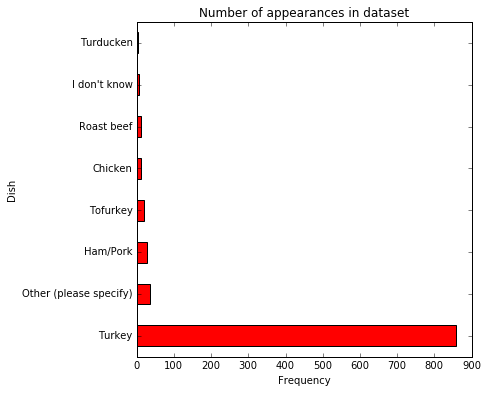

In [117]:
#Now make a pie chart
plt.figure(figsize=(6,6))
dish_type.plot(kind='barh', color='red')
plt.xlabel('Frequency')
plt.ylabel('Dish')
plt.title('Number of appearances in dataset')

In [118]:
# boolean for main dish == Tofurkey
is_Tofurkey = data["What is typically the main dish at your Thanksgiving dinner?"] =="Tofurkey"

# if Tofurkey display "Do you typically have gravy?"
print(data[is_Tofurkey]['Do you typically have gravy?'].iloc[0:5])


4     Yes
33    Yes
69     No
72     No
77    Yes
Name: Do you typically have gravy?, dtype: object


## What's for dessert?
* Now that we've looked into the main dishes, let's explore the dessert dishes. 
* Specifically, we'll look at how many people eat Apple, Pecan, or Pumpkin pie during Thanksgiving dinner. 

In [119]:
#apple
apple_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
apple_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
#pumpkin
pumpkin_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
pumpkin_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
#pecan
pecan_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
pecan_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])


In [122]:
no_pies = apple_isnull & pumpkin_isnull & pecan_isnull
only_apple_pies = apple_notnull & pumpkin_isnull & pecan_isnull
only_pumpkin_pies = apple_isnull & pumpkin_notnull & pecan_isnull
only_pecan_pies = apple_isnull & pumpkin_isnull & pecan_notnull
# create a dictionary with pie counts
pie_types = {}
pie_types['Apple'] = pd.value_counts(only_apple_pies)[1]
pie_types['Pumpkin'] = pd.value_counts(only_pumpkin_pies)[1]
pie_types['Pecan'] = pd.value_counts(only_pecan_pies)[1]
pie_types['None'] = pd.value_counts(no_pies)[1]
pie_types['Multiple'] = pd.value_counts(no_pies)[0] - pie_types['Apple'] - pie_types['Pumpkin'] - pie_types['Pecan'] 

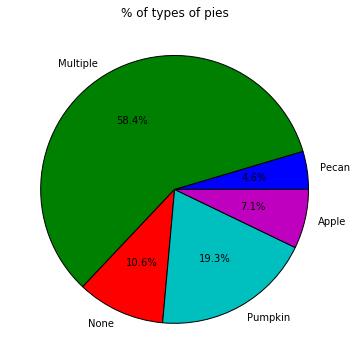

In [121]:
# plot pie data in pie chart 
plt.figure(figsize=(6,6))
plt.pie([int(v) for v in pie_types.values()],labels=pie_types.keys(), autopct='%1.1f%%')
plt.title("% of types of pies")
plt.show()

## Age Groups
* Let's analyze the Age column in more depth. In order to analyze the Age column, we'll first need to convert it to numeric values and assign categories.
    * 18 - 29
    * 30 - 44
    * 45 - 59
    * 60+
    * null

In [123]:
data["Age"].value_counts()

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64

In [124]:

def get_int_age(in_str):
    if pd.isnull(in_str):
        return None
    split_str = in_str.split(" ")
    age_str = re.sub('\+$', '', split_str[0])
    try:
        age_int = int(age_str)
    except Exception: 
        age_int = None
    return age_int


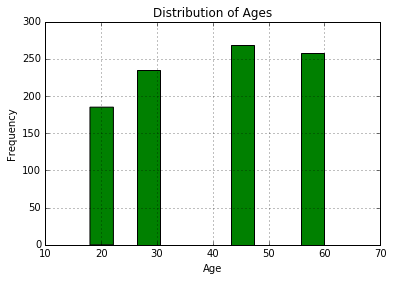

In [138]:
# store cleaned data and plot histogram
plt.figure(figsize=(6,6))
data["int_age"] = data["Age"].apply(get_int_age)
data.hist(column='int_age', color = 'green') 
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Income Groups
* The 'How much total combined money did all members of your HOUSEHOLD earn last year?' column is very similar to the Age column. It contains categories, but can be converted to numerical values. Here are the unique values in the column:

In [126]:
income_data = data['How much total combined money did all members of your HOUSEHOLD earn last year?']
print(income_data[0:5])

0      $75,000 to $99,999
1      $50,000 to $74,999
2            $0 to $9,999
3         $200,000 and up
4    $100,000 to $124,999
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: object


In [127]:
def get_int_income(in_str):
    if pd.isnull(in_str):
        return None
    first_str = in_str.split(" ")[0]
    if first_str== 'Prefer':
        return None
    
    income_str = re.sub('[\$\,]', '', first_str)
    try:
        income_int = int(income_str)
    except Exception: 
        income_int = None
    return income_int

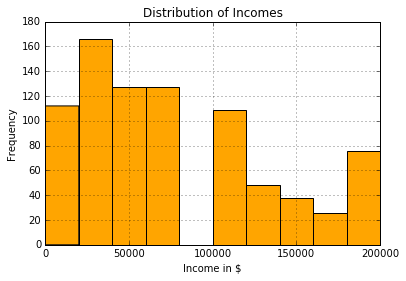

In [135]:
plt.figure(figsize=(6,6))
data["int_income"] = income_data.apply(get_int_income)
data.hist(column='int_income', color = 'orange') 
plt.title("Distribution of Incomes")
plt.xlabel("Income in $")
plt.ylabel("Frequency")
plt.show()

## Correlating Travel Distance And Income
* We can now see how the distance someone travels for Thanksgiving dinner relates to their income level.

* It's safe to hypothesize that people earning less money could be younger, and would travel to their parent's houses for Thanksgiving. 

* People earning more are more likely to have Thanksgiving at their house as a result.

* We can test this by filtering data based on int_income, and seeing what the values in the How far will you travel for Thanksgiving? column are.

In [143]:
#  low income results
is_low_income = data['int_income'] < 150000
dist_low_income = data['How far will you travel for Thanksgiving?'][is_low_income]
value_dist_low = dist_low_income.value_counts()

In [151]:
# high income results
is_high_income = data['int_income'] > 150000
dist_high_income = data['How far will you travel for Thanksgiving?'][is_high_income]
value_dist_high = dist_high_income.value_counts()


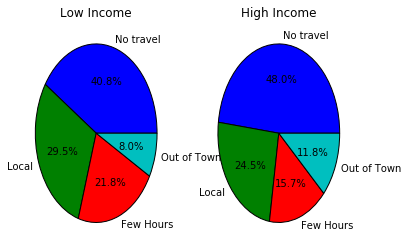

In [164]:
# pie plots
my_label = ["No travel", "Local","Few Hours","Out of Town"]
fig = plt.figure(figsize=(6,6))
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(value_dist_low, labels=my_label, autopct='%1.1f%%')
ax1.set_title("Low Income")

ax2.pie(value_dist_high, labels=my_label, autopct='%1.1f%%')
ax2.set_title("High Income")

fig.subplots_adjust(hspace=6)
plt.show()

## Linking Friendship And Age
There are two columns which directly pertain to friendship, Have you ever tried to meet up with hometown friends on Thanksgiving night?, and Have you ever attended a "Friendsgiving?. In the US, a "Friendsgiving" is when instead of traveling home for the holiday, you celebrate it with friends who live in your area. Both questions seem skewed towards younger people. Let's see if this hypothesis holds up.

In [168]:
icol = "Have you ever tried to meet up with hometown friends on Thanksgiving night?"
ccol = 'Have you ever attended a "Friendsgiving?"'
vcol = 'int_age'
tab1 = pd.pivot_table(data, values=vcol, index=icol, columns=ccol, aggfunc='mean')
print(tab1)



Have you ever attended a "Friendsgiving?"                  No        Yes
Have you ever tried to meet up with hometown fr...                      
No                                                  42.283702  37.010526
Yes                                                 41.475410  33.976744


In [ ]:
vcol2 = 'int_income'
tab2 = pd.pivot_table(data, values=vcol, index=icol, columns=ccol, aggfunc='mean')
